In [1]:
pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=3574ac63fa62eb0ec43dd1875eb062dd8eba4bcb6fd7a3342c5c7236d577c10e
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/Trabajo de Grado/Tesis/Pruebas/Multicriterio/Datasets/datos_predichosARBOL.csv")
#data = pd.read_csv("/content/drive/My Drive/Trabajo de Grado/Tesis/Pruebas/Multicriterio/Datasets/datos_simulados_equilibrados_MulticriterioARBOL.csv")
data.head(10)

,Promedio Temperatura,Promedio Humedad,Promedio CO2,Promedio TVCO,Suma,Alerta predicha
0,0.440205,0.168472,0.074892,0.015264,0.698834,Muy Alto
1,0.113952,0.180013,0.135815,0.080880,0.510661,Alto
2,0.366971,0.165835,0.012062,0.067152,0.612020,Alto
3,0.375294,0.131329,0.001785,0.034272,0.542679,Alto
4,0.418682,0.071505,0.088985,0.045456,0.624627,Muy Alto
5,0.412423,0.160093,0.007508,0.098880,0.678903,Muy Alto
6,0.139181,0.072855,0.020554,0.020400,0.252990,Medio
7,0.383324,0.151435,0.101354,0.045888,0.682001,Muy Alto
8,0.031479,0.229062,0.104431,0.095904,0.460876,Alto
9,0.330314,0.059820,0.152985,0.048864,0.591983,Alto


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Promedio Temperatura  10000 non-null  float64
 1   Promedio Humedad      10000 non-null  float64
 2   Promedio CO2          10000 non-null  float64
 3   Promedio TVCO         10000 non-null  float64
 4   Suma                  10000 non-null  float64
 5   Alerta predicha       10000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [5]:
data['Alerta predicha'].value_counts()

Alto        4867
Muy Alto    2481
Medio       2424
Bajo         228
Name: Alerta predicha, dtype: int64

In [6]:
# Variables predictoras
# X = data.iloc[:,0:5]
X = data.iloc[:,0:4]

# Variable a predecir
Y = data.iloc[:,5]

X.head()

,Promedio Temperatura,Promedio Humedad,Promedio CO2,Promedio TVCO
0,0.440205,0.168472,0.074892,0.015264
1,0.113952,0.180013,0.135815,0.080880
2,0.366971,0.165835,0.012062,0.067152
3,0.375294,0.131329,0.001785,0.034272
4,0.418682,0.071505,0.088985,0.045456


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.4, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 2480 to 7270
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Promedio Temperatura  4000 non-null   float64
 1   Promedio Humedad      4000 non-null   float64
 2   Promedio CO2          4000 non-null   float64
 3   Promedio TVCO         4000 non-null   float64
dtypes: float64(4)
memory usage: 156.2 KB


In [8]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para el sobre-muestreo de la clase minoritaria
smote = SMOTE(random_state=50)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [9]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from micromlgen import port

# Crear un objeto RandomForestClassifier
bosque = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=6)

# Ajustar el RandomForestClassifier a los datos de entrenamiento
bosque_varroa = bosque.fit(X_train_resampled, Y_train_resampled)

# Imprimir el código C++ para microcontroladores
print(port(bosque_varroa))

# Obtener el código C++ para microcontroladores
codigo_cxx = port(bosque_varroa)

# Guardar el código en un archivo
nombre_archivo = "RandomForest.txt"
with open(nombre_archivo, "w") as archivo:
    print(codigo_cxx, file=archivo)

# Imprimir el código C++
#print(codigo_cxx)

# Contar las líneas
cantidad_lineas = codigo_cxx.count('\n') + 1
print(f"La cantidad de líneas en el código C++ es: {cantidad_lineas}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
                                            else {
                                                votes[3] += 1;
                                            }
                                        }

                                        else {
                                            if (x[1] <= 0.1269400417804718) {
                                                votes[0] += 1;
                                            }

                                            else {
                                                votes[3] += 1;
                                            }
                                        }
                                    }
                                }

                                else {
                                    if (x[1] <= 0.10832979530096054) {
                                        if (x[0] <= 0.3491033762693405) {
                                    

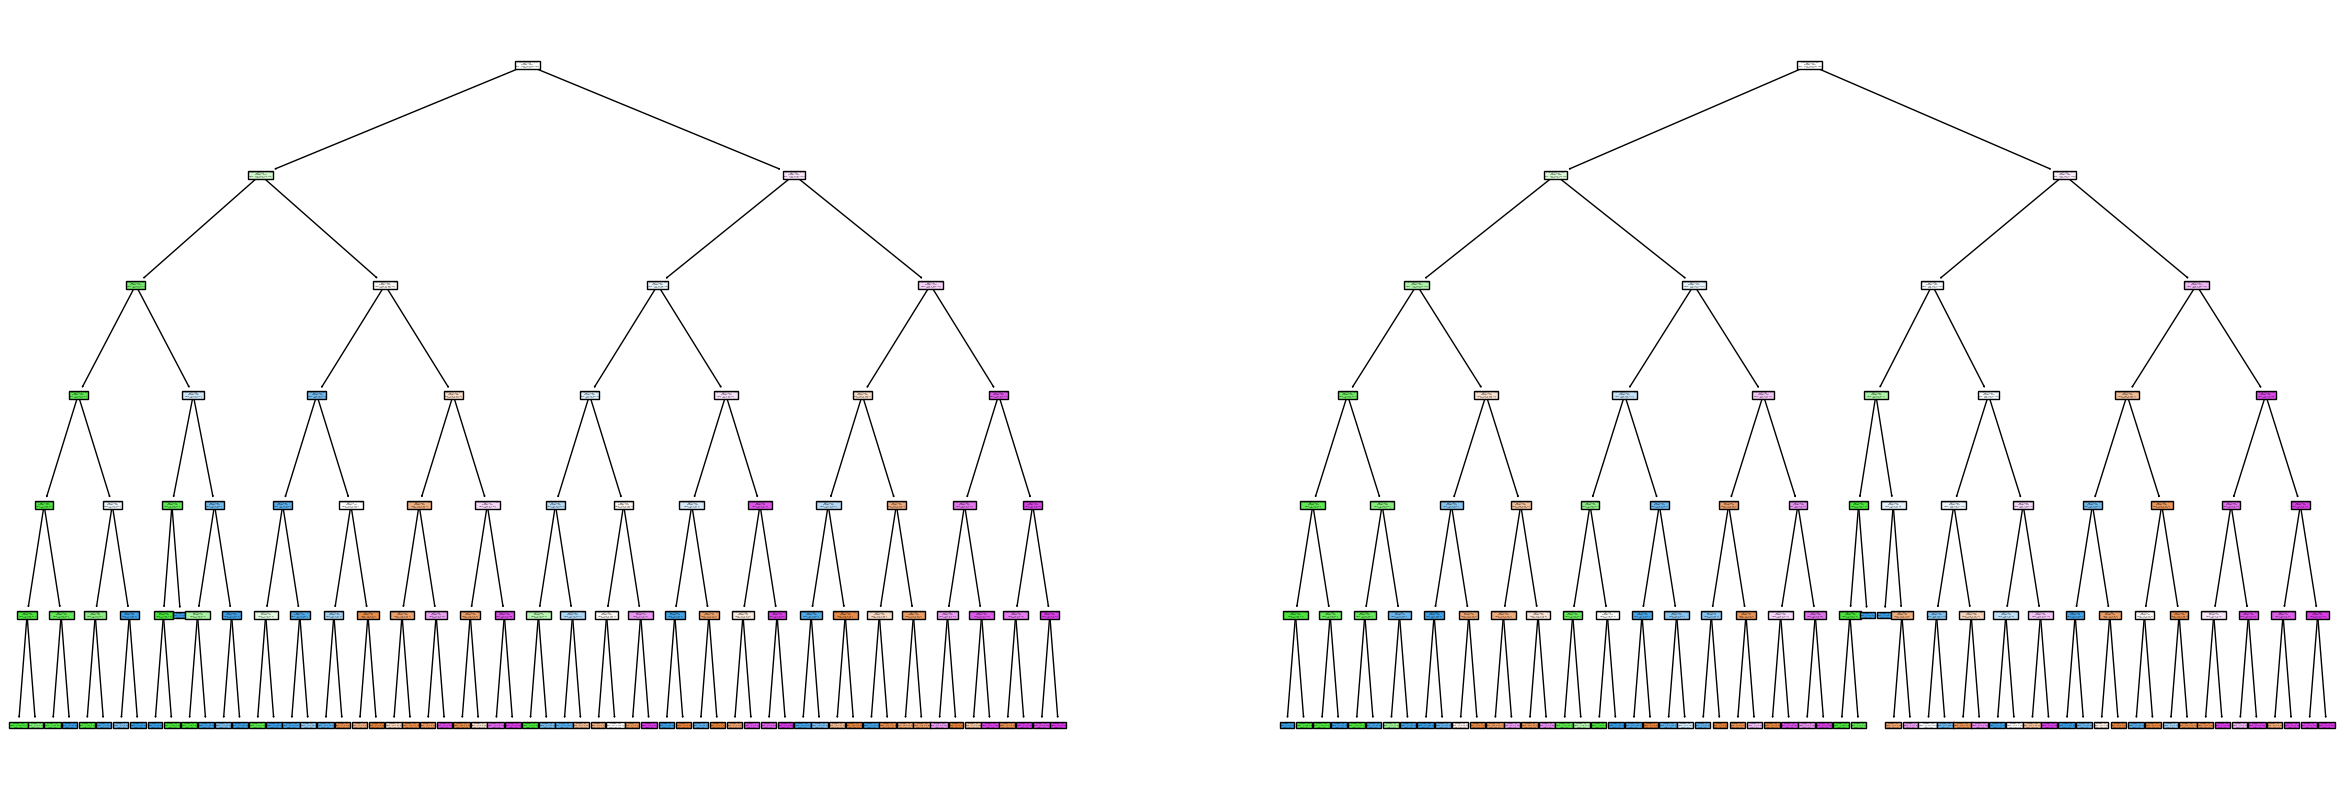

In [10]:
# Visualizar los primeros tres árboles del bosque
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (30,10), dpi=100)
for index in range(0, 2):
    tree.plot_tree(bosque_varroa.estimators_[index],
                   feature_names=list(X.columns.values),
                   class_names=list(Y.values),
                   filled=True,
                   ax = axes[index])
plt.show()

In [11]:
Y_pred = bosque_varroa.predict(X_test)

Y_pred

array(['Medio', 'Muy Alto', 'Muy Alto', ..., 'Alto', 'Muy Alto', 'Medio'],
      dtype=object)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
matriz = confusion_matrix(Y_test, Y_pred)
matriz

array([[2440,    0,  220,  210],
       [   0,  118,   18,    0],
       [  83,   66, 1334,    0],
       [  74,    0,    0, 1437]])

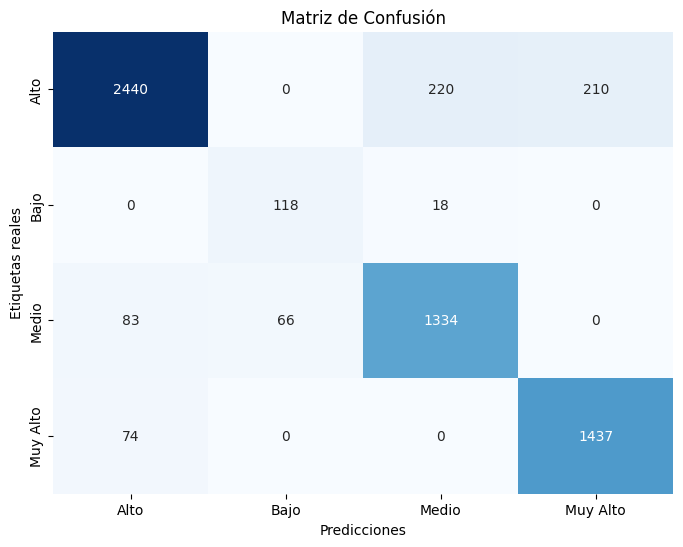

In [13]:
# Etiquetas de las clases
class_names = ['Alto', 'Bajo', 'Medio', 'Muy Alto']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

In [14]:
# Calcular la exactitud (Accuracy)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Exactitud (Accuracy): {accuracy}")

# Reporte de Clasificación (precision, recall, f1-score)
reporte_clasificacion = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:")
print(reporte_clasificacion)

matriz

Exactitud (Accuracy): 0.8881666666666667
Reporte de Clasificación:
              precision    recall  f1-score   support

        Alto       0.94      0.85      0.89      2870
        Bajo       0.64      0.87      0.74       136
       Medio       0.85      0.90      0.87      1483
    Muy Alto       0.87      0.95      0.91      1511

    accuracy                           0.89      6000
   macro avg       0.83      0.89      0.85      6000
weighted avg       0.89      0.89      0.89      6000



array([[2440,    0,  220,  210],
       [   0,  118,   18,    0],
       [  83,   66, 1334,    0],
       [  74,    0,    0, 1437]])